<a href="https://colab.research.google.com/github/rahmanziaur/DTClassifierTest/blob/main/0_RF%20Speed%20up%20test%20cases%20-%20CuML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HealthDM :MLHD Predictive Risk Stratification Tool**

The following test-cases were run to see the speed improvment as part of *Milestone # 1* of the above project. It shows the newly develped *Random Forest* model takes significantly lesser time in training stage. The dataset was prepared using the Daibetic Dataset available on *Kaggle*. The dataset is copied to the associated *Githup* [repository](https://github.com/rahmanziaur/DTClassifierTest/blob/main/diabetic_data.csv) to ease the access. The test utilises the parallel processing capacity of *RAPID- CuML* within the Premium GPU-enabled environment that works with Higher memory capacity of *Google Colab* Pro+ subscription. There notebook is available on [Github](https://github.com/rahmanziaur/DTClassifierTest). Thank you so much, R. Ziaur | CSU, Australia

**Dataset Preprocessing:**
The original dataset has missing values. Therefore it has been fixed before transforming the catagorical data into numerical data.

In [ ]:
# Mount your Google Drive to save the processed .csv file

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/DTClassifierTest/main/diabetic_data_exceptDiag.csv')

# Cat-> Num race: Caucasian =1, AfricanAmerican =2, Asian =3, Other =4 
df['race'] = df['race'].replace('Caucasian', 1)
df['race'] = df['race'].replace('AfricanAmerican', 2)
df['race'] = df['race'].replace('Asian', 3)
df['race'] = df['race'].replace('?', 3)
df['race'] = df['race'].replace('Hispanic', 4)
df['race'] = df['race'].replace('Other', 5)

#Cat-> Num gender: Female = 1, male 2
df['gender'] = df['gender'].replace('Female', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('?', 1)

#df['gender'] = df['gender'].astype(str).astype(int)

# Cat -> Num age [0-10) =1, ... [90-100) = 10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

# Cat -> Num 'discharge_disposition_id' replaced with fewer choices, though was numeric
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

# Cat --> 'admission_source_id'

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

# Cat -> Num 'Change'
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

# Cat -> Num 'diabetesMed'
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

# # Cat -> Num 'admission_source_id'
# df100['admission_source_id'] = df100['admission_source_id'].replace(6,4)

# Cat -> Num 'A1Cresult'

df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)

#Cat -> Num 'max_glu_serum'

df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

# dropping columns with missing data or has lesser relation

df = df.drop(['gender','weight','payer_code', 'medical_specialty', 'citoglipton', 'examide'], axis=1)

#added a new column to sum up three related columns

df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

#All similar data columns are shown by a new columns namely 'numchane' then, changed values at once through loop

keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

# Cat --> Num 'readmitted' to be target variable (class)
# If target columns '>30' becomes '2' meaning 3 choices, accuracy drop to 60

df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)


print("Data Types: ")
print(df.dtypes)

#Checking for missing values in the data

missing = 'NULL'
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
         missing = 'YES'

print("Missing values:", missing)
# Saving the pre-processed data into a new file
df.to_csv('/content/drive/MyDrive/0_ColabDatasets/Processed3_TestDiabData_excepDiag.csv')

# Download the dataset and put the target column at the end and then apply next codes

Data Types: 
encounter_id                int64
patient_nbr                 int64
race                        int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose                    int64
m

# GPU Environment Sanity Check #

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

Check the output of `!nvidia-smi` to make sure you've been allocated a Tesla T4, P4, or P100.

In [ ]:
!nvidia-smi

Fri Oct 28 11:08:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    45W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Setup:
Set up script installs
1. Updates gcc in Colab
1. Installs Conda
1. Install RAPIDS' current stable version of its libraries, as well as some external libraries including:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuSignal
  1. BlazingSQL
  1. xgboost
1. Copy RAPIDS .so files into current working directory, a neccessary workaround for RAPIDS+Colab integration.


In [ ]:
!pip install pynvml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.4 MB/s 


In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 3.02 MiB/s, done.
Resolving deltas: 100% (136/136), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a A100-SXM4-40GB!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [1,257 kB]
Get:13 http://secu

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 37.0.4
Uninstalling cryptography-37.0.4:
  Successfully uninstalled cryptography-37.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.1/427.1 kB 9.2 MB/s eta 0:00:00
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.2
    - dask-sql
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.12


The following package

# RAPIDS is now installed on Colab.  You can copy your code into the cells below.  Enjoy!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Large Dataset Prepeation using exiting records**

In [ ]:
# Copy dataset 30 times
import csv

N = 30

# /content/drive/MyDrive/0_ColabDatasets/abc_less_feature (2).csv

# dataset=pd.read_csv('/content/drive/MyDrive/0_ColabDatasets/abc_less_feature (2).csv')

with open('/content/drive/MyDrive/0_ColabDatasets/abc_less_feature (2).csv', 'r') as infile,\
         open('/content/drive/MyDrive/0_ColabDatasets/abc_less_feature30.csv', 'w') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    writer.writerow(next(reader))    # reads header line and writes it to output file
    data = [row for row in reader]    # reads the rest of the input file
    for i in range(N):
        writer.writerows(data)

The following portion contains the test-cases HD001 to HD006. 

**HD001: RAPID CUML: 100k Data with 100 Columns**

In [ ]:
import timeit
import pandas as pd
from cuml.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


dataset=pd.read_csv('/content/drive/MyDrive/0_ColabDatasets/1M_dataset_43_columns.csv')

feature_cols= list(dataset.columns[:-1])
target_cols=list(dataset.columns[-1:])


#features and target variable
X = dataset.drop('readmitted', axis=1) # Features
y = dataset['readmitted'] # Target variable

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 


#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate time
stop = timeit.default_timer()
train_time= stop - start
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

# Print model and dataset info
print('Test case no. HD001\n')
print('Target/Label Column: ', target_cols)
print('\n---Confusion Matrix---\n',confusion_matrix(y_test,y_pred))
print('\n---Classification Report---\n',classification_report(y_test,y_pred))
print('---CMUL---\nDataset :', dataset.shape, '\nTrain time:', train_time,'\nTest Time:', test_time)

Test case no. HD001

Target/Label Column:  ['readmitted']

---Confusion Matrix---
 [[27182    28]
 [ 3287    33]]

---Classification Report---
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     27210
           1       0.54      0.01      0.02      3320

    accuracy                           0.89     30530
   macro avg       0.72      0.50      0.48     30530
weighted avg       0.85      0.89      0.84     30530

---CMUL---
Dataset : (101766, 43) 
Train time: 0.33904330800032767 
Test Time: 2.9180469029997766


**HD002: RAPID CUML: 100k Data with 100 Columns**

In [ ]:
import timeit
import pandas as pd
from cuml.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

dataset=pd.read_csv('/content/drive/MyDrive/0_ColabDatasets/1M_dataset_100_columns.csv')

feature_cols= list(dataset.columns[:-1])
target_cols=list(dataset.columns[-1:])


#features and target variable
X = dataset.drop('readmitted', axis=1) # Features
y = dataset['readmitted'] # Target variable

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 


#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate time
stop = timeit.default_timer()
train_time= stop - start
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

# Print model and dataset info
print('Test case no. HD002\n')
print('Target/Label Column: ', target_cols)
print('\n---Confusion Matrix---\n',confusion_matrix(y_test,y_pred))
print('\n---Classification Report---\n',classification_report(y_test,y_pred))
print('---CMUL---\nDataset :', dataset.shape, '\nTrain time:', train_time,'\nTest Time:', test_time)

Test case no. HD002

Target/Label Column:  ['readmitted']

---Confusion Matrix---
 [[27163    47]
 [ 3273    47]]

---Classification Report---
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     27210
           1       0.50      0.01      0.03      3320

    accuracy                           0.89     30530
   macro avg       0.70      0.51      0.48     30530
weighted avg       0.85      0.89      0.84     30530

---CMUL---
Dataset : (101766, 100) 
Train time: 0.40024472100049024 
Test Time: 3.630698768000002


**HD003: RAPID CUML: 1 Million Data with 43 Columns**

In [ ]:
import timeit
import pandas as pd
from cuml.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

dataset=pd.read_csv('/content/drive/MyDrive/0_ColabDatasets/1M43.csv')

feature_cols= list(dataset.columns[:-1])
target_cols=list(dataset.columns[-1:])

#features and target variable
X = dataset.drop('readmitted', axis=1) # Features
y = dataset['readmitted'] # Target variable

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 


#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate time
stop = timeit.default_timer()
train_time= stop - start
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

# Print model and dataset info
print('Test case no. HD003\n')
print('Target/Label Column: ', target_cols)
print('\n---Confusion Matrix---\n',confusion_matrix(y_test,y_pred))
print('\n---Classification Report---\n',classification_report(y_test,y_pred))
print('---CMUL---\nDataset :', dataset.shape, '\nTrain time:', train_time,'\nTest Time:', test_time)

Test case no. HD003

Target/Label Column:  ['readmitted']

---Confusion Matrix---
 [[271367      0]
 [ 28846   5085]]

---Classification Report---
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    271367
           1       1.00      0.15      0.26     33931

    accuracy                           0.91    305298
   macro avg       0.95      0.57      0.61    305298
weighted avg       0.91      0.91      0.87    305298

---CMUL---
Dataset : (1017660, 43) 
Train time: 2.1822344409993093 
Test Time: 37.83962335199976


**HD004: RAPID CUML: 1 Million Data with 100 Columns**

In [ ]:
import timeit
import pandas as pd
from cuml.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

dataset=pd.read_csv('/content/drive/MyDrive/0_ColabDatasets/100-1M.csv')

feature_cols= list(dataset.columns[:-1])
target_cols=list(dataset.columns[-1:])

#features and target variable
X = dataset.drop('readmitted', axis=1) # Features
y = dataset['readmitted'] # Target variable

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 


#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate time
stop = timeit.default_timer()
train_time= stop - start
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

# Print model and dataset info
print('Test case no. HD004\n')
print('Target/Label Column: ', target_cols)
print('\n---Confusion Matrix---\n',confusion_matrix(y_test,y_pred))
print('\n---Classification Report---\n',classification_report(y_test,y_pred))
print('---CMUL---\nDataset :', dataset.shape, '\nTrain time:', train_time,'\nTest Time:', test_time)

Test case no. HD004

Target/Label Column:  ['readmitted']

---Confusion Matrix---
 [[271367      0]
 [ 25912   8019]]

---Classification Report---
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    271367
           1       1.00      0.24      0.38     33931

    accuracy                           0.92    305298
   macro avg       0.96      0.62      0.67    305298
weighted avg       0.92      0.92      0.89    305298

---CMUL---
Dataset : (1017660, 100) 
Train time: 2.4319092570003704 
Test Time: 39.236457409999275


**HD005: RAPID CUML: 3 Million Data with 43 Columns**

In [ ]:
import timeit
import pandas as pd
from cuml.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

dataset=pd.read_csv('/content/drive/MyDrive/0_ColabDatasets/3M-43.csv')

feature_cols= list(dataset.columns[:-1])
target_cols=list(dataset.columns[-1:])

#features and target variable
X = dataset.drop('readmitted', axis=1) # Features
y = dataset['readmitted'] # Target variable

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 


#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate time
stop = timeit.default_timer()
train_time= stop - start
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

# Print model and dataset info
print('Test case no. HD005\n')
print('Target/Label Column: ', target_cols)
print('\n---Confusion Matrix---\n',confusion_matrix(y_test,y_pred))
print('\n---Classification Report---\n',classification_report(y_test,y_pred))
print('---CMUL---\nDataset :', dataset.shape, '\nTrain time:', train_time,'\nTest Time:', test_time)

Test case no. HD005

Target/Label Column:  ['readmitted']

---Confusion Matrix---
 [[813394      0]
 [ 86077  16423]]

---Classification Report---
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    813394
           1       1.00      0.16      0.28    102500

    accuracy                           0.91    915894
   macro avg       0.95      0.58      0.61    915894
weighted avg       0.92      0.91      0.87    915894

---CMUL---
Dataset : (3052980, 43) 
Train time: 6.435665798999253 
Test Time: 112.28262952399928


**HD006: RAPID CUML: 3 Million Data with 100 Columns**

In [ ]:
import timeit
import pandas as pd
from cuml.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

dataset=pd.read_csv('/content/drive/MyDrive/0_ColabDatasets/3M-100.csv')

feature_cols= list(dataset.columns[:-1])
target_cols=list(dataset.columns[-1:])

#features and target variable
X = dataset.drop('readmitted', axis=1) # Features
y = dataset['readmitted'] # Target variable

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 


#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate time
stop = timeit.default_timer()
train_time= stop - start
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

# Print model and dataset info
print('Test case no. HD006\n')
print('Target/Label Column: ', target_cols)
print('\n---Confusion Matrix---\n',confusion_matrix(y_test,y_pred))
print('\n---Classification Report---\n',classification_report(y_test,y_pred))
print('---CMUL---\nDataset :', dataset.shape, '\nTrain time:', train_time,'\nTest Time:', test_time)

Test case no. HD006

Target/Label Column:  ['readmitted']

---Confusion Matrix---
 [[813394      0]
 [ 76808  25692]]

---Classification Report---
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    813394
           1       1.00      0.25      0.40    102500

    accuracy                           0.92    915894
   macro avg       0.96      0.63      0.68    915894
weighted avg       0.92      0.92      0.89    915894

---CMUL---
Dataset : (3052980, 100) 
Train time: 8.20648859100038 
Test Time: 100.66067274300076


**Training time Comparison between in Scikit-learn (CPU) and CuML(GPU)**

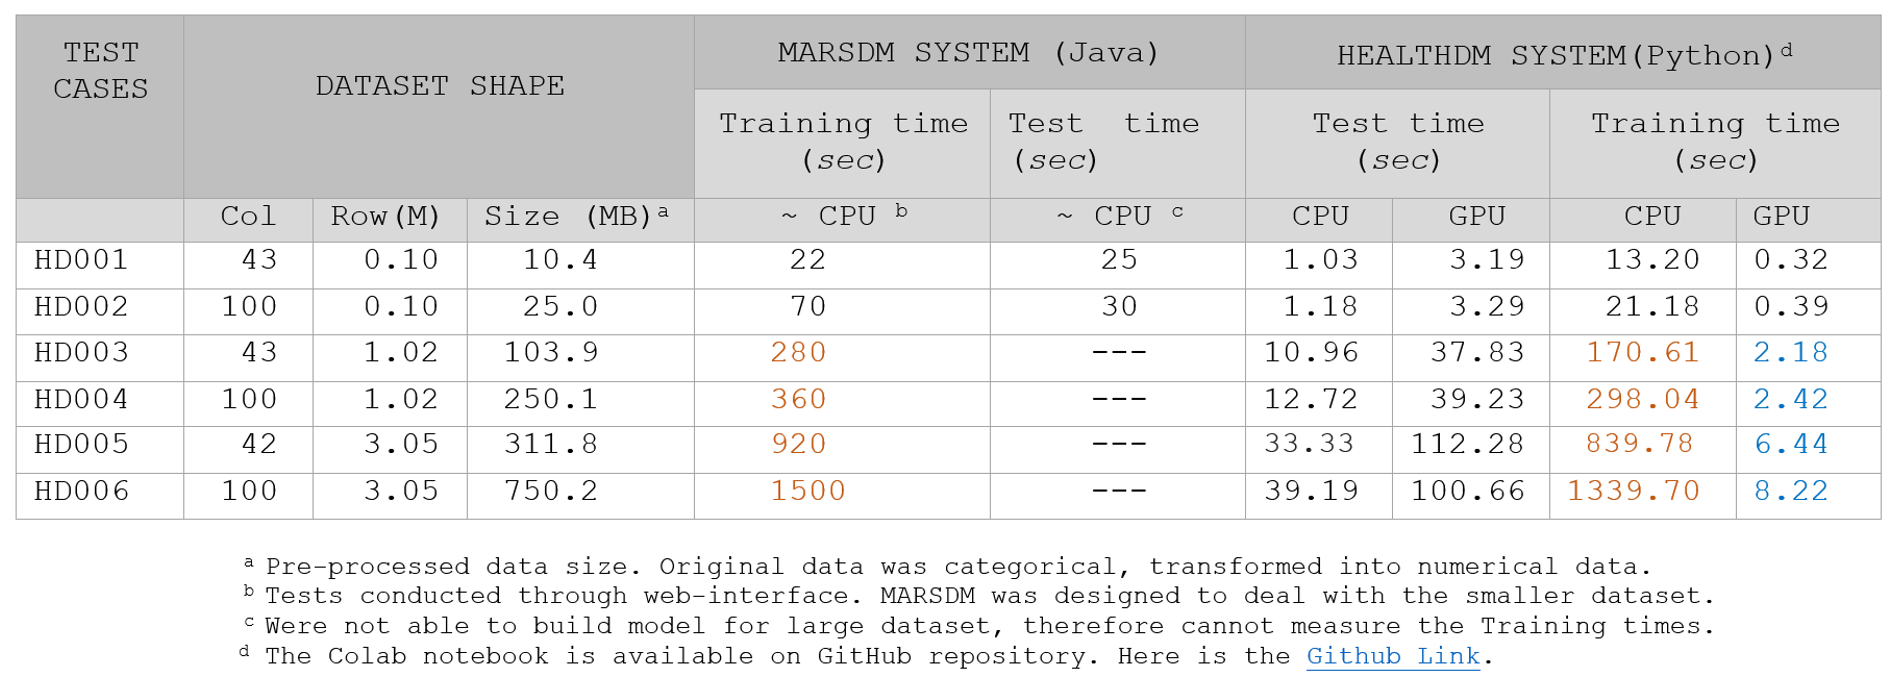

**Building Decision Trees using CuML**

Building individual decision trees is where the heavy lifting of Random Forest is done.

Individual trees are built using a list of bootstrapped samples, as was discussed above. Many algorithms use a top down approach, proceeding with depth-first splits of each node then each newly-created child node. In a GPU context, this can lead to launching an enormous number of CUDA kernels — one per node. These small kernels quickly get queued up as launch time begins to dominate the processing. To remove this bottleneck, cuML uses a breadth-first algorithm, building a full layer of the tree at a time. This makes the runtime of the algorithm scale roughly linearly with depth.

The decision tree building process has a simple structure:

```
(A) Initialize a bit mask indicating which samples are contained in each node
(B) Initialize a “node map” indicating which nodes are present at each level
(C) ForEach(tree_level)
    1. Find the node id of all data samples, using the bit mask
    2. Compute the possible splits for all bins, all columns and all nodes
    3. Find the best split for each node
    4. Update the bit mask and sparse node map to feed the next level
```


As individual Decision Trees are completely independent, building multiple decision trees is embarrassingly parallel. In some cases, the work needed to build a single tree may be too small to fully occupy a large GPU with thousands of CUDA cores. To take advantage of the whole processor, the cuML algorithm can build several trees in parallel on a single GPU. Each tree is built in its own CUDA stream controlled by an OpenMP thread on the CPU.

**Building forests across multiple GPUs**

cuML recently added an experimental feature to take this parallelism one step further and construct trees in parallel across multiple GPUs on the same node or across a cluster. This approach builds on the Dask distributed processing library.

In the distributed random forest approach, the developer first uses Dask to distribute the training data to all worker GPUs and then fits a cuml.dask.ensemble.RandomForestClassifier. The data can be randomly split and shared equally across all workers, in which case each worker builds trees on a subset of the full data. Alternatively, training data can be replicated so each worker has a complete view of the dataset. In practice, the random sharing approach effectively expands the amount of available memory and typically works well, but it may very slightly reduce model accuracy.

For a random forest with T trees and W workers, each worker will build T/W trees on its 1/Wᵗʰ fraction of locally-available data. As very little communication is required, random forests can scale efficiently to many GPUs. At inference time, predictions from trees on all of the workers are combined, just as if the trees had all been trained on a single GPU.

The Dask RF features in cuML are still experimental, and the API is subject to change in future releases. But it’s a great chance to check out the future of distributed RF and see how it works for your application. For more API details, see the [cuML’s documentation](https://docs.rapids.ai/api/cuml/stable/)

**Side by side Single GPU RF with scikit-learn**

As with other modules in cuML, the random forest implementation follows the scikit-learn API closely. So you just need to instantiate a random forest object and then call the “fit” and “predict” methods.

```
|  ######cuML######                 |  ######Sklearn######                 |
|                                   |                                      |
|  from cuml import                 |  from sklearn.ensemble import        |
|  RandomForestClassifier as cuRF   |  RandomForestClassifier as sklRF     |
|                                   |  import multiprocessing as mp        |
|                                   |                                      |
|  # cuml Random Forest params      |  #sklearn Random Forest params       |
|  cu_rf_params = {                 |  skl_rf_params = {                   |
|     ‘n_estimators’: 25,           |      ‘n_estimators’: 25,             |
|     ‘max_depth’: 13,              |      ‘max_depth’: 13,                |
|      ‘n_bins’: 15,                |                                      |
|      ‘n_streams’: 8 }             |      ‘n_jobs’: mp.cpu_count() }      |
|                                   |                                      |
|  cu_rf = cuRF(**cu_rf_params)     |  skl_rf = sklRF(**skl_rf_params)     |
|  cu_rf.fit(X_train, y_train)      |  skl_rf.fit(X_train, y_train)        |
|                                   |                                      |
|  print("cuml RF Accuracy Score: " |  print("sklearn RF Accuracy Score: " |
|  accuracy_score(                  |  accuracy_score(                     |
|  cu_rf.predict(X_test), y_test))  |  skl_rf.predict(X_test), y_test))    |
```